# **Modelagem Matemática na Quarentena**

**módulo 4 - o modelo Gompertz**

###**Carregando os pacotes necessários**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math # pacote com as funções matemáticas
from scipy.integrate import odeint, solve_ivp # pacote para resolução de equações diferenciais
# from scipy.optimize import minimize # pacote para resolução de problemas de otimização
from scipy import optimize # pacote para resolução de problemas de otimização

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**Gráfico de h(N)**

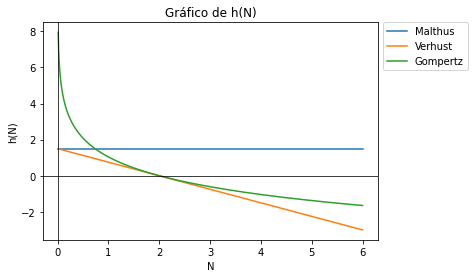

In [2]:
r = c = 1.5
K = 2
def h1(N): # Malthus
  # r = N * 1
  return r * (N / N)
def h2(N): # Verhust
  return r * (1 - (N / K))
def h3(N): # Gompertz
  return c * np.log(K / N)

a = 0.01; b = 6; i = 0.01
N = np.linspace(a, b, int(1 + (b - a) / i))

ax = plt.subplot(111)
ax.plot(N, h1(N), label = "Malthus")
ax.plot(N, h2(N), label = "Verhust")
ax.plot(N, h3(N), label = "Gompertz")
ax.axhline(y = 0, xmin = 0, xmax = max(N), linewidth = 0.75, color = "black", linestyle = '-')
ax.axvline(x = 0, ymin = max(N), ymax = 0.0, linewidth = 0.75, color = "black", linestyle = '-')

plt.xlabel("N")
plt.ylabel("h(N)")
plt.title(r"Gráfico de h(N)")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.89))
plt.show()

###**Análise Qualitativa**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


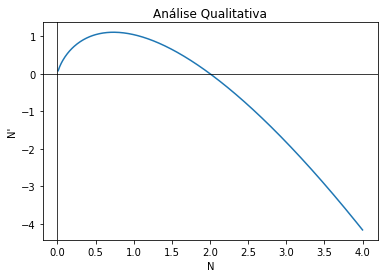

In [3]:
r = c = 1.5
K = 2
ax = plt.subplot(111)
def dN(N):
  return c * np.log(K / N) * N

a = 0.01; b = 4; i = 0.01
N = np.linspace(a, b, int(1 + (b - a) / i))

ax = plt.subplot(111)
ax.plot(N, dN(N))
ax.axhline(y = 0, xmin = 0, xmax = max(N), linewidth = 0.75, color = "black", linestyle = '-')
ax.axvline(x = 0, ymin = max(N), ymax = 0.0, linewidth = 0.75, color = "black", linestyle = '-')

plt.xlabel("N")
plt.ylabel("N'")
plt.title(r"Análise Qualitativa")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


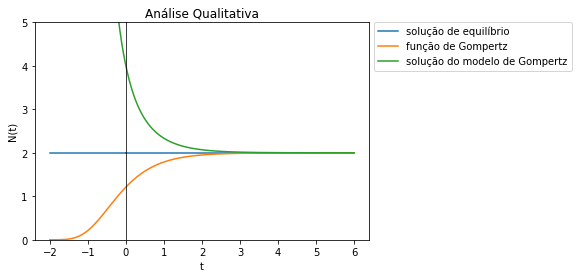

In [4]:
r = c = 1.5
K = 2
N0 = 4
def sol_eq(t): # solução de equilíbrio
  return K * (t / t)
def fc_gompertz(t): # curva de Gompertz
  return 2 * np.exp(-(K / N0) * np.exp(-c * t))
def sol_gompertz(t): # solução do modelo de Gompertz
  return K * np.exp(-np.log(K / N0) * np.exp(-c * t))

a = -2.0; b = 6; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))

ax = plt.subplot(111)
ax.plot(t, sol_eq(t), label = "solução de equilíbrio")
ax.plot(t, fc_gompertz(t), label = "função de Gompertz")
ax.plot(t, sol_gompertz(t), label = "solução do modelo de Gompertz")
ax.axhline(y = 0, xmin = 0, xmax = max(N), linewidth = 0.75, color = "black", linestyle = '-')
ax.axvline(x = 0, ymin = max(N), ymax = 0.0, linewidth = 0.75, color = "black", linestyle = '-')
plt.axis([None, None, 0, 5])

plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Análise Qualitativa")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.89))
plt.show()

###**Função de Gompertz**

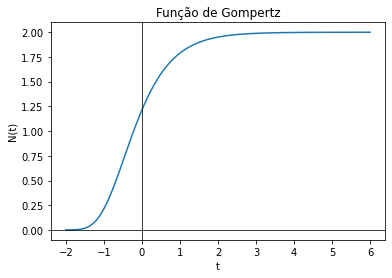

In [5]:
c = 1.5; K = 2; N0 = 4
c0 = (K / N0)
def fc_gompertz(t): # função de Gompertz
  return K * np.exp(-c0 * np.exp(-c * t))

a = -2.0; b = 6; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))

ax = plt.subplot(111)
ax.plot(t, fc_gompertz(t))
ax.axhline(y = 0, xmin = 0, xmax = max(N), linewidth = 0.75, color = "black", linestyle = '-')
ax.axvline(x = 0, ymin = max(N), ymax = 0.0, linewidth = 0.75, color = "black", linestyle = '-')

plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Função de Gompertz")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.89))
plt.show()

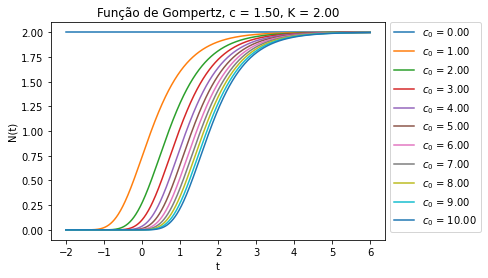

In [6]:
# função de Gompertz para diferentes valores dos parâmetros
c = 1.5; K = 2;
# N0 = 4
# c0 = (K / N0)

a = -2.0; b = 6; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 10; i = 1.0
ax = plt.subplot(111)
for c0 in np.linspace(a, b, int(1 + (b - a) / i)):
  fcg = K * np.exp(-c0 * np.exp(-c * t))
  ax.plot(t, fcg, label = r'$c_0$ = {0:.2f}'.format(c0))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Função de Gompertz, c = {0:.2f}, K = {1:.2f}".format(c, K))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.52))
plt.show()

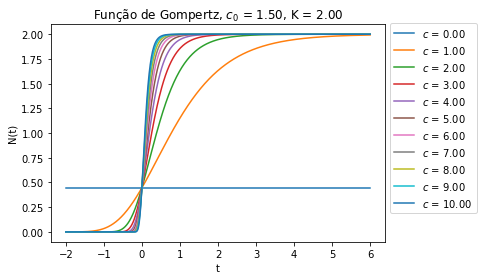

In [7]:
# função de Gompertz para diferentes valores dos parâmetros
c0 = 1.5; K = 2;
# N0 = 4
# c0 = (K / N0)

a = -2.0; b = 6; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 10; i = 1.0
ax = plt.subplot(111)
for c in np.linspace(a, b, int(1 + (b - a) / i)):
  fcg = K * np.exp(-c0 * np.exp(-c * t))
  ax.plot(t, fcg, label = r'$c$ = {0:.2f}'.format(c))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Função de Gompertz, $c_0$ = {0:.2f}, K = {1:.2f}".format(c0, K))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.57))
plt.show()

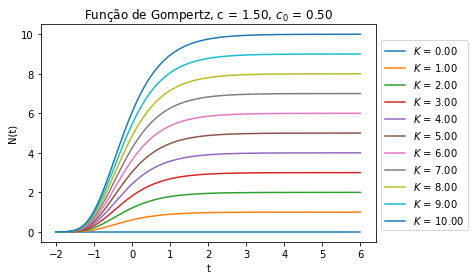

In [8]:
# função de Gompertz para diferentes valores dos parâmetros
c = 1.5; K = 2;
N0 = 4
c0 = (K / N0)

a = -2.0; b = 6; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 10; i = 1.0
ax = plt.subplot(111)
for K in np.linspace(a, b, int(1 + (b - a) / i)):
  fcg = K * np.exp(-c0 * np.exp(-c * t))
  ax.plot(t, fcg, label = r'$K$ = {0:.2f}'.format(K))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Função de Gompertz, c = {0:.2f}, $c_0$ = {1:.2f}".format(c, c0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.49))
plt.show()

###**Aplicação do Modelo Gompertz**

In [0]:
def gomp_ot(c): # função de Gompertz
  c1 = c[0]
  c2 = c[1]
  c3 = c[2]
  N = c1 * np.exp(-c2 * np.exp(-c3 * x))
  return np.linalg.norm(y - N)

*Projeção infectados na Espanha - COVID-19*

In [10]:
# dados de infectados da Espanha
base_espanha = pd.read_csv('/content/drive/My Drive/Colab Notebooks/espanha-1.csv', sep = ";") # população brasileira
base_espanha.head()

,Dia,Infectados
0,1,1695
1,5,6391
2,9,14769
3,13,28768
4,17,57786


In [11]:
# otmização: min_{a, b, c} ||y - N||,   N (t) = ae^(-be^(-ct))
x = base_espanha.iloc[:, 0].values
y = base_espanha.iloc[:, 1].values
c0 = [1, 1, 1]
sol = optimize.fmin_bfgs(gomp_ot, c0, disp=0) # utilizando método BFGS
print(sol)

[2.77729110e+05 4.93745500e+00 6.74339467e-02]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


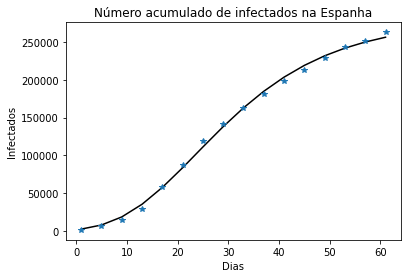

In [12]:
# ajuste dos dados com o modelo Gompertz
x = base_espanha.iloc[:, 0].values
y = base_espanha.iloc[:, 1].values
y_estimado = sol[0] * np.exp(-sol[1] * np.exp(-sol[2] * x))
plt.plot(x, y_estimado, color = "black")
plt.plot(x, y, "*")
plt.xlabel("Dias")
plt.ylabel("Infectados")
plt.title("Número acumulado de infectados na Espanha")
plt.show()

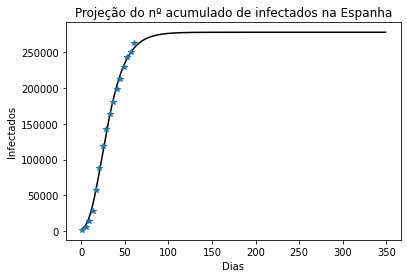

In [13]:
# projeção do número de infectados na Espanha
x = base_espanha.iloc[:, 0].values
y = base_espanha.iloc[:, 1].values
x_projecao = np.arange(0, 350, 1)
y_hat = sol[0] * np.exp(-sol[1] * np.exp(-sol[2] * x_projecao))
plt.plot(x_projecao, y_hat, color = "black")
plt.plot(x, y, "*")
plt.xlabel("Dias")
plt.ylabel("Infectados")
plt.title("Projeção do nº acumulado de infectados na Espanha")
plt.show()

*Projeção infectados na Brasil - COVID-19*

In [14]:
# dados de infectados do Brasil
base_brasil = pd.read_csv('/content/drive/My Drive/Colab Notebooks/brasil-1.csv', sep = ";") # população brasileira
base_brasil.head()

,Dia,Infectados
0,1,1178
1,4,2247
2,7,3417
3,10,4630
4,12,6880


In [15]:
# otmização: min_{a, b, c} ||y - N||,   N (t) = ae^(-be^(-ct))
x = base_brasil.iloc[:, 0].values
y = base_brasil.iloc[:, 1].values
c0 = [6, 6, 6]
sol = optimize.fmin_bfgs(gomp_ot, c0, disp=0) # utilizando método BFGS
print(sol)

[2.59412002e+06 7.41778845e+00 1.88481625e-02]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


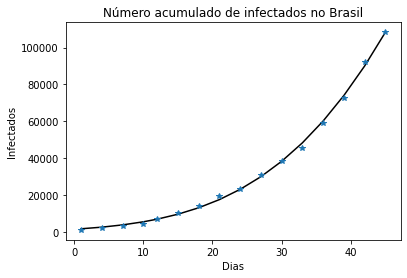

In [16]:
# ajuste dos dados com o modelo Gompertz
x = base_brasil.iloc[:, 0].values
y = base_brasil.iloc[:, 1].values
y_estimado = sol[0] * np.exp(-sol[1] * np.exp(-sol[2] * x))
plt.plot(x, y_estimado, color = "black")
plt.plot(x, y, "*")
plt.xlabel("Dias")
plt.ylabel("Infectados")
plt.title("Número acumulado de infectados no Brasil")
plt.show()

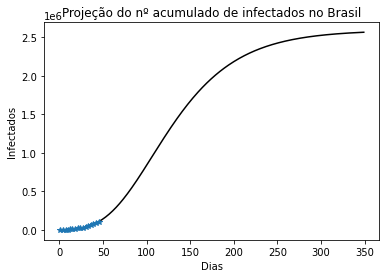

In [17]:
# projeção do número de infectados no Brasil
x = base_brasil.iloc[:, 0].values
y = base_brasil.iloc[:, 1].values
x_projecao = np.arange(0, 350, 1)
y_hat = sol[0] * np.exp(-sol[1] * np.exp(-sol[2] * x_projecao))
plt.plot(x_projecao, y_hat, color = "black")
plt.plot(x, y, "*")
plt.xlabel("Dias")
plt.ylabel("Infectados")
plt.title("Projeção do nº acumulado de infectados no Brasil")
plt.show()